# **SuPy Bowl Analysis** #

In [35]:
# Load tools needed for project 1
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import panel as pn
import os
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline  
pn.extension('plotly')
import hvplot.pandas

In [50]:
#imort .env keys
load_dotenv()
mapbox = os.getenv("mapbox_api_key")
px.set_mapbox_access_token(mapbox)

#imort image
from PIL import Image
im = Image.open("trophy.jfif")
#re-size image and save new file to fit needs
size = (640,960)
out = im.resize(size)
out.save('resized-trophy.jfif')
im_resized = Image.open('resized-trophy.jfif')

In [143]:
# Import Data

nfl_data = pd.DataFrame([])
years_start = 1996
years_end = 2021
for year in range(years_start,years_end):
        url = f'https://www.pro-football-reference.com/years/{year}/preseason_odds.htm'
        df = pd.read_html(url)[0]
        df['year'] = year
        nfl_data = nfl_data.append(df, ignore_index=True, sort=False)
        
nfl_data.columns = ['Team', 'Super Bowl Odds', 'W/l Over-Under', 'Record', 'Year']

nfl_data.sort_values(['Year','Super Bowl Odds'], ascending=True, inplace=True)
nfl_data.set_index('Year')
first_column = nfl_data.pop('Year')
nfl_data.insert(0, 'Year', first_column)

nfl_data.head()



,Year,Team,Super Bowl Odds,W/l Over-Under,Record
25,1996,San Francisco 49ers,250,12.0,12-4 (push)
7,1996,Dallas Cowboys,600,10.5,10-6 (under)
10,1996,Green Bay Packers,800,10.0,13-3 (over)
23,1996,Pittsburgh Steelers,1000,10.0,10-6 (push)
14,1996,Kansas City Chiefs,1200,9.0,9-7 (push)


In [137]:
#Import superbowl.csv
superbowl_df = Path ("../Project-1_Team-2/superbowl_data.csv")
#read imported csv
superbowl = pd.read_csv(
    superbowl_df)
#add Season Year column and calculate season year; this cleans up the data since the Super Bowl happens in a different calendar year than the season starts
superbowl['Season Year'] = superbowl['Year'] - 1
#moves Season Year to the first column
first_column = superbowl.pop('Season Year')
superbowl.insert(0, 'Season Year', first_column)
#view data sample to validate
superbowl.head(10)

,Season Year,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,2020,Feb 7,2021,LV (55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
1,2019,Feb 2,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
2,2018,Feb 3,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
3,2017,Feb 4,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
4,2016,Feb 5,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
5,2015,Feb 7,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California
6,2014,Feb 1,2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona
7,2013,Feb 2,2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey
8,2012,Feb 3,2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana
9,2011,Feb 5,2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana


## Strategy Development

In [138]:
#define strategy 1,2,3 

# Strategy 1 - $100 on favorite
def top1(x):
    dftop1 = nfl_data[nfl_data['Year']== x]
    return dftop1.head(1)
# Strategy 2 - $100 on Top 2
def top2(x):
    dftop2 = nfl_data[nfl_data['Year'] == x]
    return dftop2.head(2)

# Strategy 3 - $100 on Top 5def top5(x):
def top5(x):
    dftop5 = nfl_data[nfl_data['Year'] == x]
    return dftop5.head(5)

In [139]:
#if top5(2019)['Team'] == superbowl['team']
#superbowl['strategy1'] = total + winning(100*Odd)
#else
#superbowl['strategy1'] = total -100

## Validation of Bet Strategies Functions #

In [146]:
top1(2007)

,Year,Team,Super Bowl Odds,W/l Over-Under,Record
361,2007,New England Patriots,250,11.5,16-0 (over)


In [145]:
top2(2007)

,Year,Team,Super Bowl Odds,W/l Over-Under,Record
361,2007,New England Patriots,250,11.5,16-0 (over)
368,2007,San Diego Chargers,600,10.5,11-5 (over)


In [128]:
top5(2007)

,Year,Team,Super Bowl Odds,W/l Over-Under,Record
361,2007,New England Patriots,250,11.5,16-0 (over)
368,2007,San Diego Chargers,600,10.5,11-5 (over)
356,2007,Indianapolis Colts,800,10.5,13-3 (over)
348,2007,Chicago Bears,1400,10.0,7-9 (under)
345,2007,Baltimore Ravens,2000,9.0,5-11 (under)


# Visualizing the Results #

In [ ]:
# Charting - Individual Bar Graph Strat 1, 2, & 3

# Charting - Combined Bar Graph Total Wins Over Years

# Charting - Combine Bar Graph Total $ Won or Lost Over Years

In [ ]:
# Correlation Analysis

# 1. Correlation between end of season preseason leaders vs. Making SB
# Charting - Pie Chart? Scatter Plot?

In [ ]:
# 2. Correlation between end of season records of preseason favorites vs SB Teams
# Charting - Side by side - Bar Graph?

In [ ]:
# 3. Correlation between preseason wins vs regular season success  
# Charting - Side by side - Bar Graph?

In [ ]:
# Post Season Analysis
# Distance Travel by Teams wins and losses
# Charting - Heatmap?

# Post Season odds

# _"If you're not IN the parade, you WATCH the parade. That's life."_ - Mike Ditka

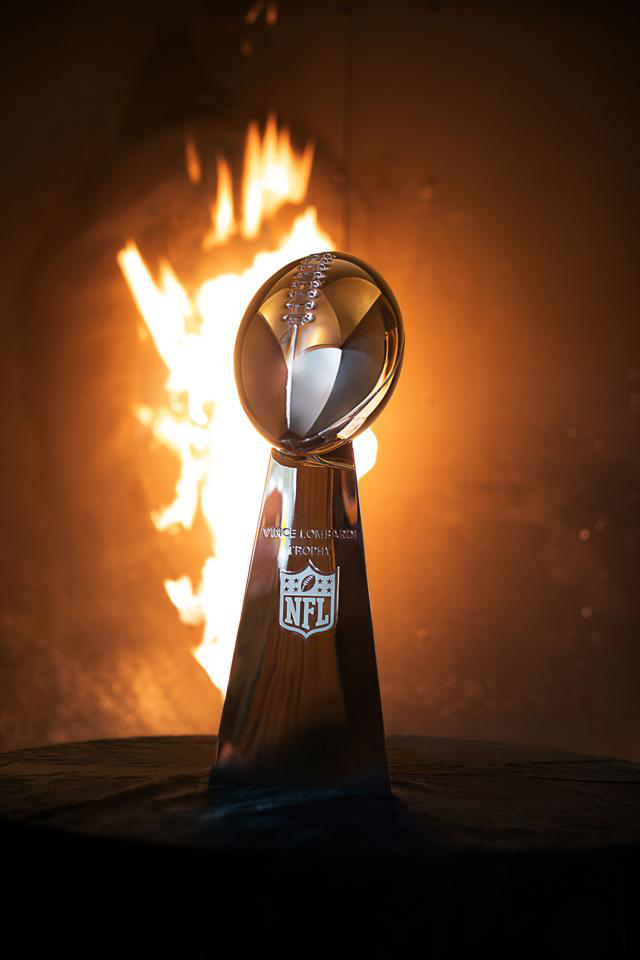

In [53]:
display(im_resized)